# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [2]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [3]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss  = signal.convolve2d(image, gaussFilter, boundary='symm', mode='same')
filterResponseSobelX = signal.convolve2d(image, sobelX, boundary='symm', mode='same')
filterResponseSobelY = signal.convolve2d(image, sobelY, boundary='symm', mode='same')

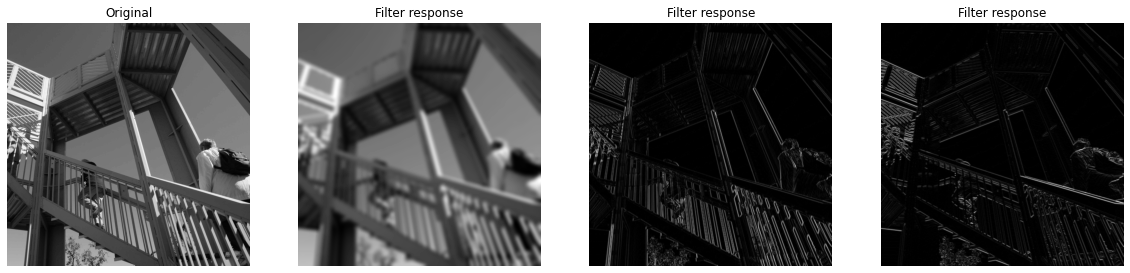

In [4]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?
> SobelX is detecting vertical lines in the picture, SobelY is detecting horizontal lines and Gaussian is applying an isotropic Gaussian smoothing kernel to the picture with a standard deviation of 0.5 which leads to blurring the picture (increasing sigma will increase blurring)

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?
> The original image is 512x512 with one channel (grey scale). A color image usually has 3 channels (Red, Blue, Green)

Question 3: What is the size of the different filters?
> All have size 3x3 besides the Gaussian with size 15x15

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?
> The filter response equals the input size

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 
> The size is 510x510 since no zero padding is used (otherwise we add one entire frame of zeros to the image before applying the convolution in the case of a 3x3 filter) - for the Gaussian Kernel we get 498x498

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?
> In networks with a lot of layers, the the image will shrink and will eventually run out of pixels to convolve! Also, for example for segmenation tasks, we need the same output size as the input in the end.

In [9]:
# Your code for checking sizes of image and filter responses
print(gaussFilter.shape)
print(sobelX.shape)
print(sobelY.shape)

print(signal.convolve2d(image, gaussFilter, boundary='symm', mode='valid').shape)
signal.convolve2d(image, sobelY, boundary='symm', mode='valid').shape

(15, 15)
(3, 3)
(3, 3)
(498, 498)


(510, 510)

##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [6]:
# import os
# import warnings

# # Ignore FutureWarning from numpy
# warnings.simplefilter(action='ignore', category=FutureWarning)

# import keras.backend as K
# import tensorflow as tf

# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# # The GPU id to use, usually either "0" or "1";
# os.environ["CUDA_VISIBLE_DEVICES"]="0";

# # Allow growth of GPU memory, otherwise it will always look like all the memory is being used
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True) 

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ? 
> Because we apply one filter to each channel of the image (RGB image)

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?
> No, since it is no standard convolution of one matrix but rather trains and applies one unique filter to each input channel matrix and combines them to one single feature map.

Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.
> It will not be equally faster, since probably we cannot fit all 1000 images in the GPU at once, which is why we need to reload parts of the batch in the GPU (load part of batch, convolve, load next images, ... until batch is clear). This could lead to efficiency losses and will lead to a (compared to 3 images) slower processing. But if we assume, that all images can be fit in the GPU memory, then 1000 images will be ralatively faster since only 3 images will be too little work for the GPU to use its "power" efficiently for speedup.

##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [5]:
from tensorflow.keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

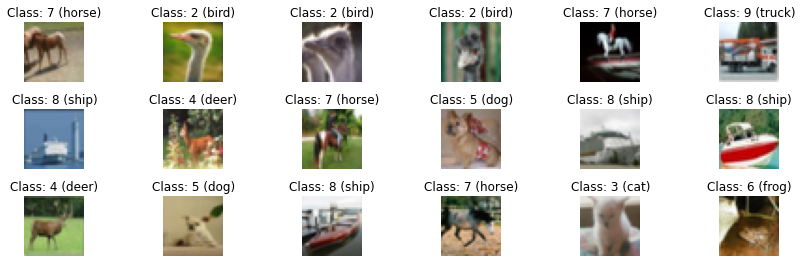

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [8]:
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size = 0.25)

# Print the size of training data, validation data and test data
print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xval has size {}.'.format(Xval.shape))
print('Yval has size {}.'.format(Yval.shape))

print('Xtest has size {}.'.format(Xtest.shape))
print('Ytest has size {}.'.format(Ytest.shape))

Xtrain has size (7500, 32, 32, 3).
Ytrain has size (7500, 1).
Xval has size (2500, 32, 32, 3).
Yval has size (2500, 1).
Xtest has size (2000, 32, 32, 3).
Ytest has size (2000, 1).


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [9]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [10]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print('Shapes before converting the labels')
print('Ytrain has size {}.'.format(Ytrain.shape))
print('Yval has size {}.'.format(Yval.shape))
print('Ytest has size {}.'.format(Ytest.shape))

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain, 10)
Yval = to_categorical(Yval, 10)
Ytest = to_categorical(Ytest, 10)

# Print shapes after converting the labels
print('Shapes after converting the labels')
print('Ytrain has size {}.'.format(Ytrain.shape))
print('Yval has size {}.'.format(Yval.shape))
print('Ytest has size {}.'.format(Ytest.shape))

Shapes before converting the labels
Ytrain has size (7500, 1).
Yval has size (2500, 1).
Ytest has size (2000, 1).
Shapes after converting the labels
Ytrain has size (7500, 10).
Yval has size (2500, 10).
Ytest has size (2000, 10).


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [12]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy as CC

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Input(shape=input_shape))
    model.add(Conv2D(n_filters, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(BatchNormalization(momentum = 0.75))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer 
    for i in range(n_conv_layers-1):
        n_filters = n_filters * 2
        model.add(Conv2D(n_filters, kernel_size=(3, 3), padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
    
    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(n_nodes, activation="relu"))
        model.add(BatchNormalization())
        if (use_dropout):
            model.add(Dropout(0.5))
        
    # Add final dense layer
    model.add(Dense(10, activation="softmax"))
   
    # Compile model
#     adam = Adam(lr = learning_rate, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss=CC, optimizer=Adam(lr = learning_rate), metrics=['accuracy'])
    
    return model

In [13]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [14]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model1 = build_CNN(input_shape, n_conv_layers=2, n_filters=16,
                   n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain, Ytrain, batch_size, epochs, verbose=2, validation_data=(Xval, Yval))

2022-04-25 20:09:59.389066: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-25 20:09:59.623240: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-04-25 20:09:59.927135: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-04-25 20:09:59.927175: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-04-25 20:10:00.488332: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-04-25 20:10:00.488444: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-04-25

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-04-25 20:10:18.947657: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-04-25 20:10:22.770719: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-04-25 20:10:36.804349: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-04-25 20:10:36.823700: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
75/75 - 23s - loss: 2.9229 - accuracy: 0.3319 - val_loss: 2.1157 - val_accuracy: 0.4204
Epoch 2/20
75/75 - 0s - loss: 1.5475 - accuracy: 0.4869 - val_loss: 1.5507 - val_accuracy: 0.4872
Epoch 3/20
75/75 - 0s - loss: 1.2433 - accuracy: 0.5660 - val_loss: 1.2985 - val_accuracy: 0.5468
Epoch 4/20
75/75 - 0s - loss: 

In [15]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest, Ytest, batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 [==============================] - 0s 2ms/step - loss: 2.7021 - accuracy: 0.5585
Test loss: 2.7021
Test accuracy: 0.5585


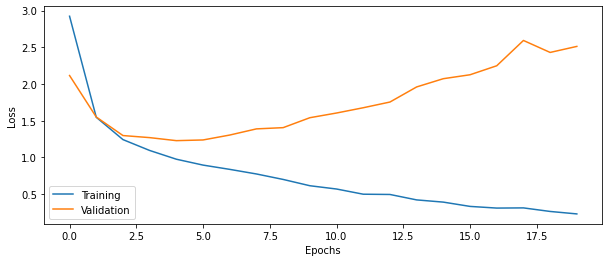

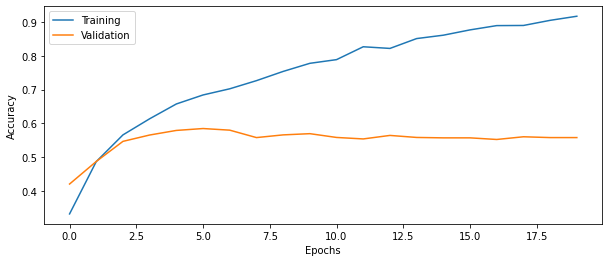

In [16]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Question 10: How big is the difference between training and test accuracy?
> Out training accuracy is around 92% and the test accuracy only reaches around 55% which indicates high overfitting (so not satisfying)

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?
> Here we use image inputs, so the input size of one image in a batch is a lot bigger than in the DNN lab (32 \* 32 \* 3 > 3000 in comparison to 92 values in the DNN)

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [17]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model2 = build_CNN(input_shape, n_conv_layers=2, n_filters=16,
                   n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain, Ytrain, batch_size, epochs, verbose=2, validation_data=(Xval, Yval))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @t

In [18]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest, Ytest, batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 [==============================] - 0s 3ms/step - loss: 3.0872 - accuracy: 0.5415
Test loss: 3.0872
Test accuracy: 0.5415


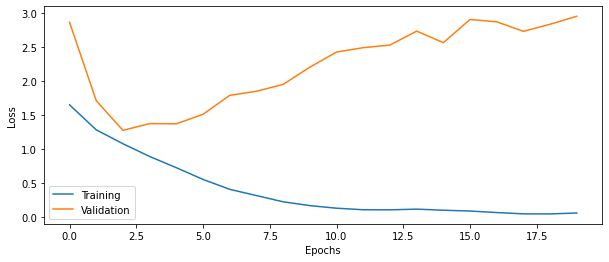

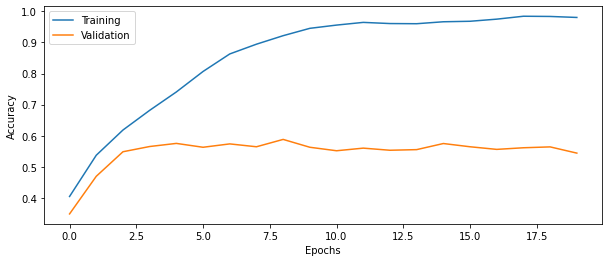

In [19]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [20]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model3 = build_CNN(input_shape, n_conv_layers=4, n_filters=16,
                   n_dense_layers=1, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain, Ytrain, batch_size, epochs, verbose=2, validation_data=(Xval, Yval))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @t

In [21]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest, Ytest, batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 [==============================] - 0s 3ms/step - loss: 2.5687 - accuracy: 0.5995
Test loss: 2.5687
Test accuracy: 0.5995


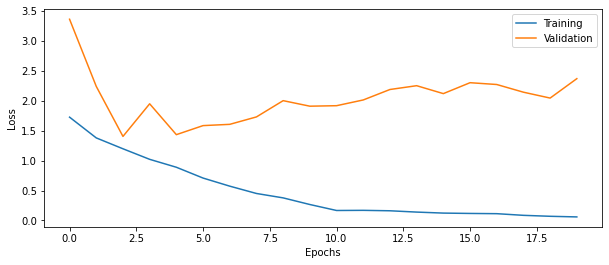

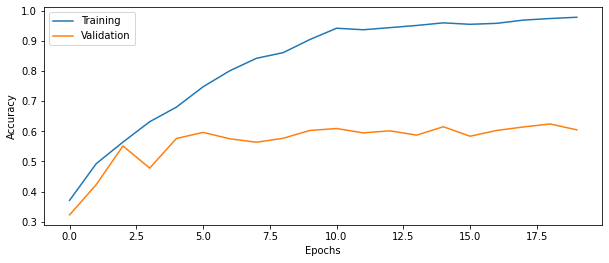

In [22]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?
> 124,180 trainable parameters, most of them in the later occuring convolutions (due to increasing channel size) and in the dense layer

Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 
> The input is the output of the layer before, for the first conv-layer its the input image with 3 channels, for all other convolutions it is the output of the max pooling which is reducing the size of the feature maps (50%) but keeps the channels. The output of a con-layer are feature maps of the same size as the input (since we use "same" padding) and the channels equals the number of filters in this layer. Basically, we train n filters that have size 3x3xnum_input_channels and get one input_size x input_size feature map back from each filter, for every image in the batch, so in total batch size x n different feature maps from the size of the input). <br> <br> From the offical website: "batch_shape + (channels, rows, cols)"

Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/
> Yes! Quote: 4+D tensor with shape: batch_shape + (channels, rows, cols) 

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?
> The number of channels equals 128, one channel per input_size x input_size x 32 filter

Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?
> The number of parameters can be calculated as follows: $n_{params} = (inputChannels \cdot kernelSize) \cdot n_{filters} + n_{filters}$, so we train n_filters filters of size (inputChannels x input_dim1 x input_dim2) which is the first part of the equation, and then we add one bias weight for every of those filters (so each filter leads to one feature map (after all channels are combined) which can be interpreted as one node in a DNN)

Question 17: How does MaxPooling help in reducing the number of parameters to train?
> Max pooling is taking the max over a frame of 2x2 (here in our example) with stride that is equal to this pooling size (if not specified different) which is essentially cutting the dimensions of the input in half


In [11]:
(16*3*3)*32 + 32 # num params = (input_channels * kernel_size) * num_filters + num_filters_bias

4640

In [23]:
# Print network architecture

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)         

##  Part 14: Dropout regularization

Add dropout regularization to each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?
> The test accuracy improved about 1% compared to the model without dropout

Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?
> You just add the argument kernel_regularizer=l2(0.01) for example (also possible for the bias: bias_regularizer=l2(0.01))

## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [24]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model4 = build_CNN(input_shape, n_conv_layers=4, n_filters=16,
                   n_dense_layers=1, n_nodes=50, use_dropout=True, learning_rate=0.01)

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain, Ytrain, batch_size, epochs, verbose=2, validation_data=(Xval, Yval))

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @t

In [25]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest, Ytest, batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

20/20 [==============================] - 0s 3ms/step - loss: 2.0227 - accuracy: 0.6115
Test loss: 2.0227
Test accuracy: 0.6115


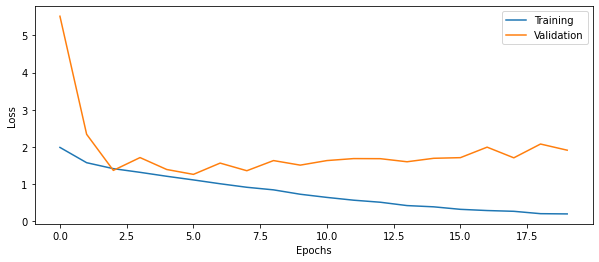

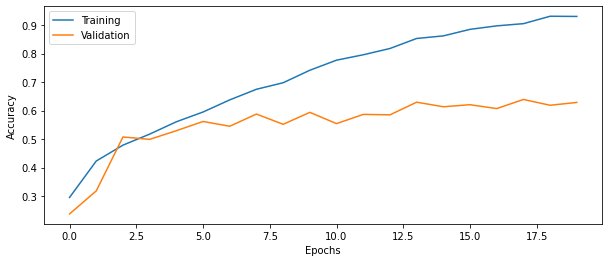

In [26]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?
> Our best configuration got around 65% accuracy.

## Your best config

In [ ]:
# # Setup some training parameters
# batch_size = 32
# epochs = 20
# input_shape = Xtrain.shape[1:]

# # Build model
# model5 = build_CNN(input_shape, n_conv_layers=3, n_filters=16,
#                    n_dense_layers=2, n_nodes=64, use_dropout=True, learning_rate=0.01)

# # Train the model  using training data and validation data
# history5 = model5.fit(Xtrain, Ytrain, batch_size, epochs, verbose=2, validation_data=(Xval, Yval))

In [27]:
from tensorflow.keras.optimizers import SGD

# define cnn model
def build_CNN2(input_shape, n_conv_layers, n_filters, n_nodes, learning_rate):
    
    # Setup a sequential model
    model = Sequential()
    
    # Add Input shape
    model.add(Input(shape=input_shape))
    
    # Add Convolution layers
    for i in range(n_conv_layers-1):
        model.add(Conv2D(n_filters, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(n_filters, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
        
        # Double the number of filters in every iteration
        n_filters = n_filters * 2
    
    # Add flatten layer
    model.add(Flatten())
    
    # Add dense layer
    model.add(Dense(n_nodes, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    
    # Add final dense layer
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [28]:
# Setup some training parameters
batch_size = 64
epochs = 100
input_shape = Xtrain.shape[1:]

# Build Model
model5 = build_CNN2(input_shape, n_conv_layers=3, n_filters=32, n_nodes=128, learning_rate=0.001)

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain, Ytrain, batch_size=64, epochs=100, verbose=0, validation_data=(Xval, Yval))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph

In [29]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest, Ytest, batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

32/32 [==============================] - 2s 48ms/step - loss: 1.4241 - accuracy: 0.6470
Test loss: 1.4241
Test accuracy: 0.6470


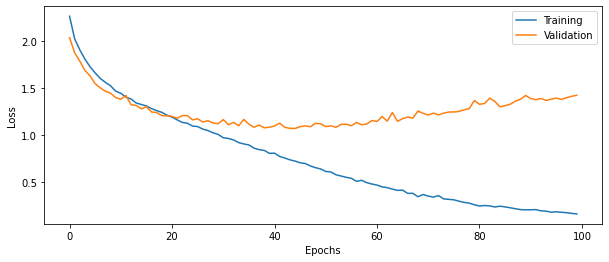

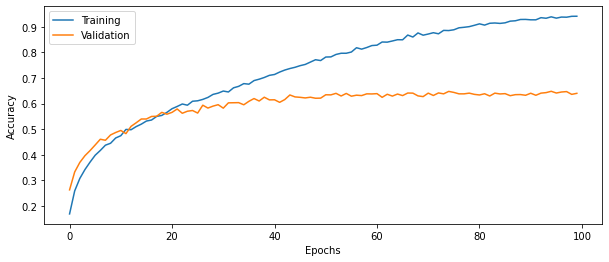

In [30]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.
> \~23% vs. 60.5% so it performs really bad on the rotated dat~, this is due to the fact that the model has never seen such pictures during training (only straight ones). That is why it is not able to generalize well of them since this is very new for the model.

In [31]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

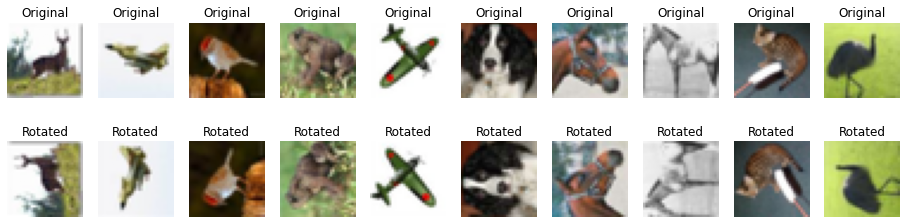

In [32]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [33]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated, Ytest, batch_size=batch_size)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

32/32 [==============================] - 0s 5ms/step - loss: 5.8417 - accuracy: 0.2330
Test loss: 5.8417
Test accuracy: 0.2330


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

In [34]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [36]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Split data
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size = 0.20)

# Image Data Generator
datagen = ImageDataGenerator(
        rotation_range=30, # rotation
        horizontal_flip=True, # horizontal flip
        vertical_flip=True) # vertical flip

# Setup a flow for training data, assume that we can fit all images into CPU memory
it_train = datagen.flow(Xtrain, Ytrain, batch_size=64)

# Setup a flow for validation data, assume that we can fit all images into CPU memory
it_valid = datagen.flow(Xval, Yval, batch_size=64)

## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?
> There is a funcitonality in Keras where we can specify a file path to a local directory from which the model should load the images (so if not all can be fit at once, we load in smaller batches from the directory on the fly). Disadvantages: Slower

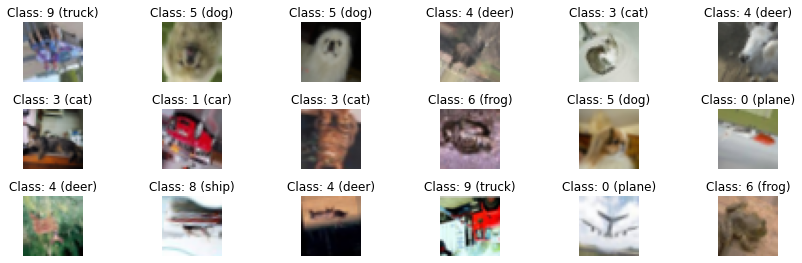

In [37]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. What parameter is necessary to change to perform more training?
> The training accuracy is rising slower but the model overfits less. This is due to the fact that we decrease overfitting when using augumented images: If we only train on the same images again and again, we will overfit the data and perform worse on the unseen/unused validation data. But if we add noise in form of rotation, zoom, etc we do not show the model the same image again and again in every epoch but rather show a slightly modified one which leads to better generalization!

Question 24: What other types of image augmentation can be applied, compared to what we use here?
> Zoom, channel flips, ...

In [38]:
# Setup some training parameters
batch_size = 64
epochs = 100
input_shape = Xtrain.shape[1:]

validation_split=0.2

# set steps for training and validation data
stepsT = int((len(Xtrain)*(1-validation_split)) / batch_size)
stepsV = int((len(Xval)*(validation_split)) / batch_size)

# Build model (your best config)
model6 = build_CNN2(input_shape, n_conv_layers=3, n_filters=32, n_nodes=128, learning_rate=0.001)
    
# Train the model using on the fly augmentation
history6 = model6.fit(it_train, steps_per_epoch=stepsT, epochs=epochs, validation_data=(Xval, Yval), verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph

In [39]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.1785
Test accuracy: 0.5770
Test loss: 2.1980
Test accuracy: 0.3055


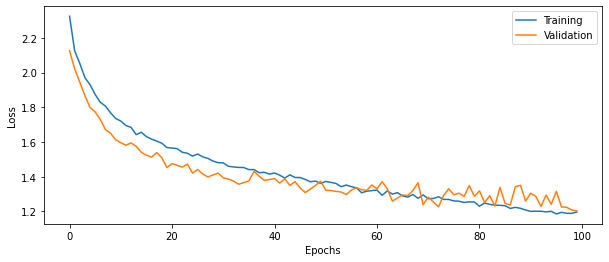

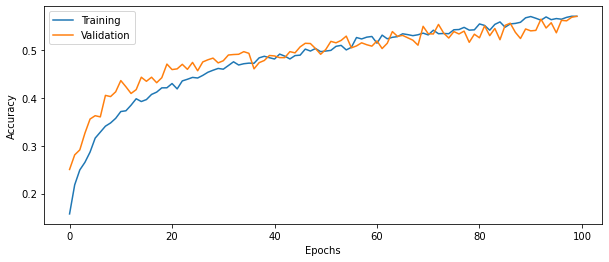

In [40]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [41]:
# Find misclassified images
y_pred=model6.predict(Xtest) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


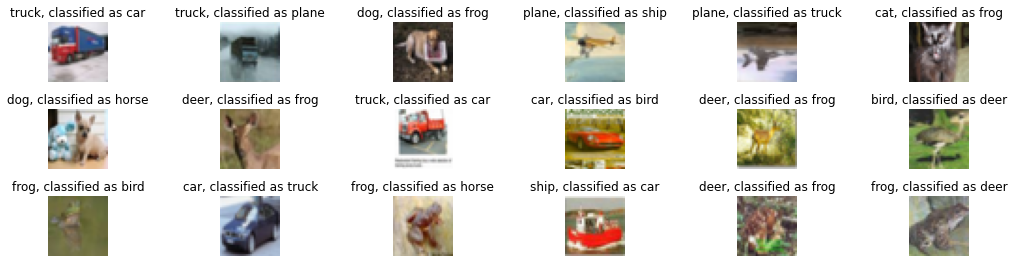

In [42]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?
> No it cannot be applied to images of other sizes because of the dense layers in the end! They expect a certain number of values after the feature maps are flattened, because one weight needs to be trained for every value in the output feature maps which will be input to the dense layer. If we use pictures of different size, we get higher/lower number of inputs after flattening. 

Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?
> Just use a fully convolutional neural network, since the trained weights refer to the learned filters which can be applied to images of different sizes (as long as the numebr of channels is the same)

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have? 
> 48

Question 28: How many trainable parameters does the ResNet50 network have? 
> Over 23 million 

Question 29: What is the size of the images that ResNet50 expects as input?
>  224 x 224 x 3

Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.
> The Hessian in this case would have a size of (23 million X 23 million) which is insanely computationally expensve

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [43]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_paths = ['cat.jpg', 'monkey.jpg', 'jellyfish.jpg', 'red_panda.jpg', 'goose.jpg']

for i in img_paths:
    img = image.load_img(i, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Predict
    preds = model.predict(x)

    # print prediction
    print('Predicted:', decode_predictions(preds, top=3)[0])


102973440/102967424 [==============================] - 1s 0us/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02124075', 'Egyptian_cat', 0.9170737), ('n02123045', 'tabby', 0.052064538), ('n02123159', 'tiger_cat', 0.02088113)]
Predicted: [('n02487347', 'macaque', 0.907421), ('n02